# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [5]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


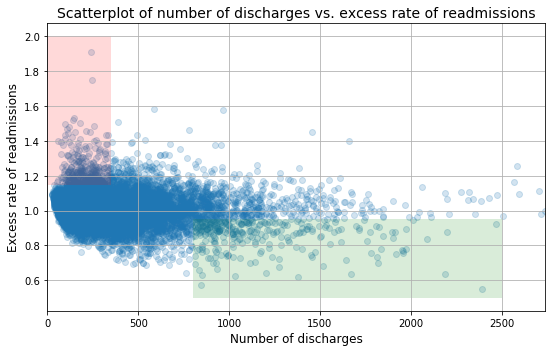

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A. Do you agree with the above analysis and recommendations? Why or why not?


I don't agree with the above analysis for the following reason:
- When looking at the R squared between number of discharges and excess readmission ratio, the R squared is only -9%, which means there's no strong correlation between them. (The chart that was shown above does not even show a linear trend)

- Also, the analysis is comparing directly on the number without going through any statistical significance chance. It would be better to reach conclusion after doing the stats test.

In [15]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

- Setup an appropriate hypothesis test.
- Compute and report the observed significance value (or p-value).
- Report statistical significance for  αα  = .01.
- Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
- Look at the scatterplot above.
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

Only include the data that has valid number of discharges, Excess Readmission Ratio and also starting date and ending date 

In [29]:
clean_hospital_read_df['Excess Readmission Ratio']=pd.to_numeric(clean_hospital_read_df['Excess Readmission Ratio'])

In [39]:
clean_hospital_read_df1=clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']!=0]

In [40]:
clean_hospital_read_df1.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


Make sure we are comparing all the hospitals within same time frame:

In [41]:
clean_hospital_read_df1['Start Date']=pd.to_datetime(clean_hospital_read_df1['Start Date'])
clean_hospital_read_df1['End Date']=pd.to_datetime(clean_hospital_read_df1['End Date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
clean_hospital_read_df1['start_date_end_date_day_diff']=clean_hospital_read_df1['End Date']-clean_hospital_read_df1['Start Date']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
clean_hospital_read_df1.loc[clean_hospital_read_df1['start_date_end_date_day_diff']!='1095 days']

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,start_date_end_date_day_diff


Hypothesis test:

- Ho: There's no significant difference between hospital with 1000 discharges and hospitals with less than 100 discharges on the lower excess readmission rate.
- H1: Hospitals with over 1000 discharges have lower excess readmission rate than the hospital with less than 100 discharges.

In [55]:
# Create two df for comparison: df_discharge_less_than_100, df_discharge_more_than_1000

df_discharge_less_than_100=clean_hospital_read_df1.loc[clean_hospital_read_df1['Number of Discharges']<100]
df_discharge_more_than_1000=clean_hospital_read_df1.loc[clean_hospital_read_df1['Number of Discharges']>1000]

In [56]:
df_discharge_less_than_100.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,start_date_end_date_day_diff
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,2010-07-01,2013-06-30,1095 days
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,2010-07-01,2013-06-30,1095 days
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,2010-07-01,2013-06-30,1095 days
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,2010-07-01,2013-06-30,1095 days
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,2010-07-01,2013-06-30,1095 days


Distribution of the Excess Readmission Ratio for both sample groups:

In [57]:
import seaborn as sns

In [60]:
df_discharge_less_than_100_mean=df_discharge_less_than_100['Excess Readmission Ratio'].mean()
df_discharge_less_than_100_std=df_discharge_less_than_100['Excess Readmission Ratio'].std()
df_discharge_less_than_100_count=len(df_discharge_less_than_100['Excess Readmission Ratio'])

In [61]:
print(df_discharge_less_than_100_mean)
print(df_discharge_less_than_100_std)
print(df_discharge_less_than_100_count)

1.0226183501683506
0.05797860323426279
1188


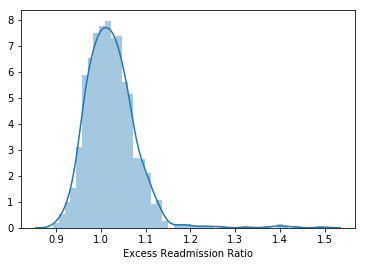

In [58]:
sns.distplot(df_discharge_less_than_100['Excess Readmission Ratio'])

In [63]:
df_discharge_more_than_1000_mean=df_discharge_more_than_1000['Excess Readmission Ratio'].mean()
df_discharge_more_than_1000_std=df_discharge_more_than_1000['Excess Readmission Ratio'].std()
df_discharge_more_than_1000_count=len(df_discharge_more_than_1000['Excess Readmission Ratio'])

In [64]:
print(df_discharge_more_than_1000_mean)
print(df_discharge_more_than_1000_std)
print(df_discharge_more_than_1000_count)

0.9783354211663071
0.12000735348224047
463


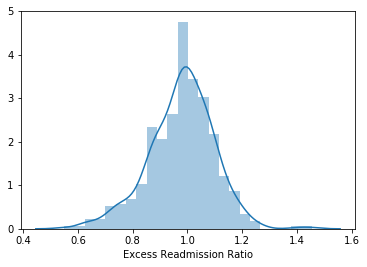

In [65]:
sns.distplot(df_discharge_more_than_1000['Excess Readmission Ratio'])

In [66]:
mean_diff=df_discharge_less_than_100_mean-df_discharge_more_than_1000_mean

In [68]:
SE=np.sqrt(df_discharge_more_than_1000_std**2/df_discharge_more_than_1000_count+df_discharge_less_than_100_std**2/df_discharge_less_than_100_count)

In [70]:
z_test_statistics=mean_diff/SE
print(z_test_statistics)

7.6017424185


The Z score for 0.01 stats sig is around 2.58. In this case the z test statistics is higher than the z critical. So we should reject the null hypothesis and conclude than the hospital with more than 1000 discharge is significantly lower than the hospitals with lower than 100 discharges. But from the pratical signifcance standpoint, a diffence of 0.04 might not be significant enough for upgrading small hospital readmission system or merging hospitals.

In [72]:
mean_diff

0.04428292900204345

In [83]:
avg_readmission_ratio_by_state=clean_hospital_read_df1.groupby('State')['Excess Readmission Ratio'].agg(['mean', 'count']).sort_values(by='mean')

In [86]:
avg_readmission_ratio_by_state.reset_index(inplace=True)

In [90]:
avg_readmission_ratio_by_state.set_index('State', inplace=True)

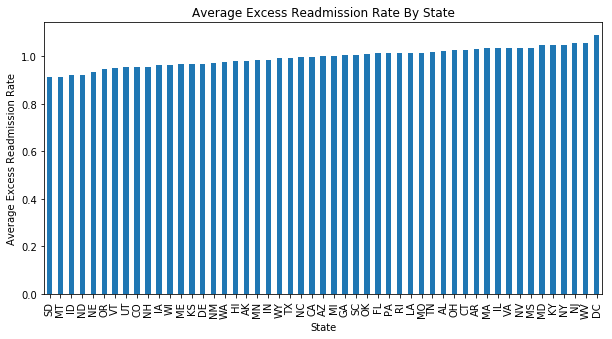

In [140]:
plt.figure(figsize=(10,5))
avg_readmission_ratio_by_state['mean'].plot(kind='bar')
plt.title("Average Excess Readmission Rate By State")
plt.ylabel("Average Excess Readmission Rate")
plt.xlabel("State")
plt.show()

In [97]:
clean_hospital_read_df1['Excess Readmission Ratio'].mean()

1.0075037835957146

In [106]:
total_hospital_count_by_state=clean_hospital_read_df1.groupby('State')['State'].count()

Get the count of the hospital that has over average excess readmission rate:

In [102]:
excessive_readmission_hospital_count_by_state=clean_hospital_read_df1.loc[clean_hospital_read_df1['Excess Readmission Ratio']>clean_hospital_read_df1['Excess Readmission Ratio'].mean()].groupby('State')['State'].count()

In [128]:
redmission_proportion_by_state=pd.merge(pd.DataFrame(total_hospital_count_by_state),pd.DataFrame(excessive_readmission_hospital_count_by_state), left_index=True, right_index=True)

In [129]:
redmission_proportion_by_state.columns

Index(['State_x', 'State_y'], dtype='object')

Get the proportion of the hospitals with higher than average excess readmission rate by state:

In [132]:
redmission_proportion_by_state=redmission_proportion_by_state.rename(columns={'State_x': 'Total Hospital Count', 'State_y': 'Excess Hospital Count'})

In [135]:
redmission_proportion_by_state.head()

,Total Hospital Count,Excess Hospital Count,readmission hospital proportion
State,,,
AK,22,6,0.272727
AL,271,145,0.535055
AR,170,98,0.576471
AZ,206,86,0.417476
CA,933,411,0.440514


In [134]:
≈['readmission hospital proportion']=redmission_proportion_by_state['Excess Hospital Count']/redmission_proportion_by_state['Total Hospital Count']

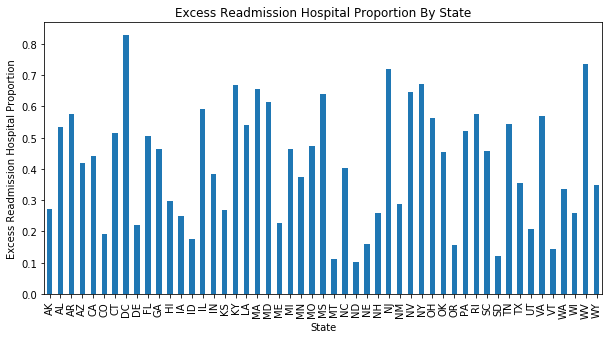

In [141]:
plt.figure(figsize=(10,5))
redmission_proportion_by_state['readmission hospital proportion'].plot(kind='bar')
plt.title("Excess Readmission Hospital Proportion By State")
plt.ylabel("Excess Readmission Hospital Proportion")
plt.show()

By looking at the chart above, DC and WV is more likely to have hospitals with high excess readmission rate. So state is also an important factor here.

Look at the scatterplot above.
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

- Disdvantage of the plot is plot is very scattered. It's hard to detect the readmission rate patterns for most of the hospitals with median discharge size. 
- The advantage of the plot is that scatter plot can help sometimes to discover some trend when we are doing some exploratory analysis. Here we do see that the hospitals with more than 1000 discharges tend to have a lower excess readmission rate.

Here I will choose to use classifiy the hospitals into four groups based on the distribution of the number of discharges they have and then construct a scatter plot to see if there's any correlation between the number of discharges and excess readmission rate within the group. Also I will construct a bar plot on the average excess readmission rate across the groups for comparison.

In [146]:
clean_hospital_read_df1['Number of Discharges'].describe()

count    11497.000000
mean       365.466209
std        308.754590
min         25.000000
25%        160.000000
50%        282.000000
75%        474.000000
max       6793.000000
Name: Number of Discharges, dtype: float64

In [160]:
clean_hospital_read_df1.loc[clean_hospital_read_df1['Number of Discharges']<160, 'Number of Discharges Class']='Number of Discharges less than 160'
clean_hospital_read_df1.loc[(clean_hospital_read_df1['Number of Discharges']>=282)&(clean_hospital_read_df1['Number of Discharges']<475), 'Number of Discharges Class']='Number of Discharges greater than 282 less than 475'
clean_hospital_read_df1.loc[(clean_hospital_read_df1['Number of Discharges']>=475)&(clean_hospital_read_df1['Number of Discharges']<1000), 'Number of Discharges Class']='Number of Discharges greater than 475 less than 1000'
clean_hospital_read_df1.loc[clean_hospital_read_df1['Number of Discharges']>=1000, 'Number of Discharges Class']='Number of Discharges more than 1000'
clean_hospital_read_df1.loc[(clean_hospital_read_df1['Number of Discharges']>=160)&(clean_hospital_read_df1['Number of Discharges']<282), 'Number of Discharges Class']='Number of Discharges greater than 160 less than 282'

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [161]:
clean_hospital_read_df1['Number of Discharges Class'].unique()

array(['Number of Discharges less than 160',
       'Number of Discharges greater than 160 less than 282',
       'Number of Discharges greater than 282 less than 475',
       'Number of Discharges greater than 475 less than 1000',
       'Number of Discharges more than 1000'], dtype=object)

By looking at the plots below, I'm not seeing a strong correlation between # discharges and excess readmission rate here within each group.

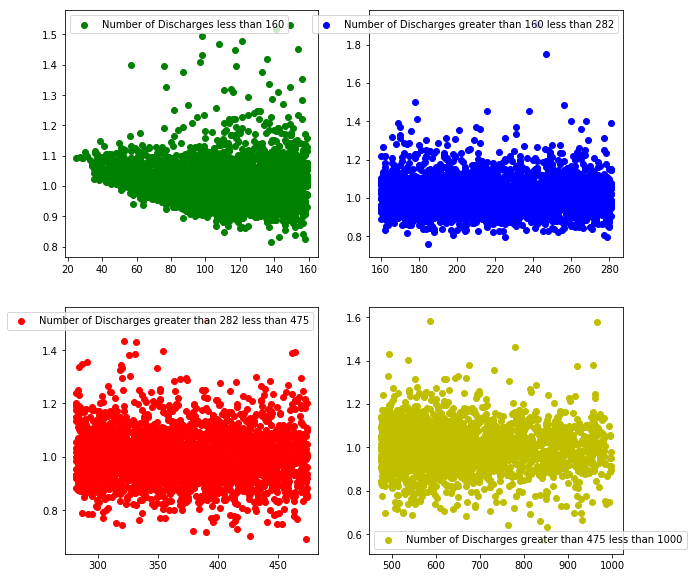

In [194]:
color_list=['g', 'b', 'r', 'y']
plt.figure(figsize=(10,10))
for i in range(4):
    
    subplot(2,2,i+1)
    class_discharge=list(clean_hospital_read_df1['Number of Discharges Class'].unique())[i]
    data=clean_hospital_read_df1.loc[clean_hospital_read_df1['Number of Discharges Class']==class_discharge]
    plt.scatter(data["Number of Discharges"], data["Excess Readmission Ratio"], c=color_list[i], label=class_discharge)
    plt.legend()
    plt.plot()

Construct a bar plot on the average excess readmission rate:

As you can see the hospitals with dischages less than 160 has a higher average excess readmission rate than the hospitals with over 1000 discharges.

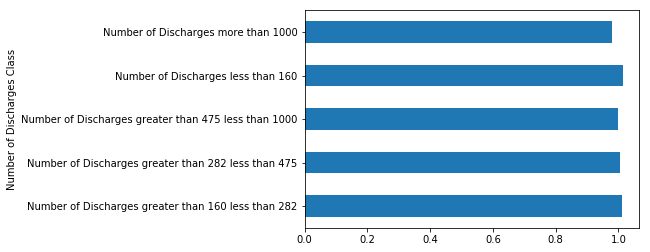

In [202]:
clean_hospital_read_df1.groupby('Number of Discharges Class')['Excess Readmission Ratio'].mean().plot(kind='barh')